In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import datetime as dt

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\NYC_trip.csv')
print(data.shape) #identifying size of data
data.isna().sum() #checking for missing values

(729322, 11)


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [3]:
data['pickup_datetime'].head()

0    2016-02-29 16:40:21
1    2016-03-11 23:35:37
2    2016-02-21 17:59:33
3    2016-01-05 09:44:31
4    2016-02-17 06:42:23
Name: pickup_datetime, dtype: object

In [4]:
data.dtypes #identifying datatypes of eachg attribute

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [5]:
#Converting the datatypes of datetime columns to datetime format from object dtype
data.pickup_datetime=pd.to_datetime(data.pickup_datetime) 
data.dropoff_datetime=pd.to_datetime(data.dropoff_datetime)
data.dtypes #Checking the datatypes again

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
dtype: object

In [6]:
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag.values == 'Y')
data.head(404)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,848
...,...,...,...,...,...,...,...,...,...,...,...
399,id2993748,1,2016-06-28 09:57:32,2016-06-28 10:14:36,1,-73.951584,40.769657,-74.007317,40.711758,0,1024
400,id2733049,1,2016-03-02 20:05:12,2016-03-02 20:52:52,2,-73.978134,40.757484,-73.998955,40.614380,1,2860
401,id2754505,1,2016-03-09 13:22:33,2016-03-09 13:31:42,1,-73.994186,40.741184,-73.993118,40.752796,0,549
402,id0520156,2,2016-06-22 19:57:30,2016-06-22 20:07:35,1,-74.003250,40.726967,-74.010330,40.730770,0,605


In [7]:
data['check_trip_duration'] = (data['dropoff_datetime'] - data['pickup_datetime']).map(lambda x: x.total_seconds())

duration_difference = data[np.abs(data['check_trip_duration'].values  - data['trip_duration'].values) > 1]
duration_difference.shape

(0, 12)

In [8]:
data['trip_duration'].describe()/3600    #description of trip duration in hours

count    202.589444
mean       0.264508
std        1.073507
min        0.000278
25%        0.110278
50%        0.184167
75%        0.298611
max      538.815556
Name: trip_duration, dtype: float64

C:\Users\Shruti Negi\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


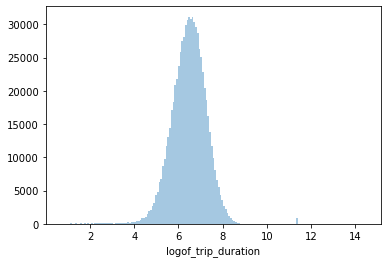

In [9]:
data['logof_trip_duration']=np.log(data['trip_duration'].values+1)
sb.distplot(data['logof_trip_duration'], kde=False, bins=175)
plt.show()

In [25]:
'''The Majority of the rides follow smooth distribution, peak just around exp(6.45) i.e about approx 17 minutes
There are several suspiciously short rides with less than 10 seconds duration.
There are a few huge outliers near 12'''

'The Majority of the rides follow smooth distribution, peak just around exp(6.45) i.e about approx 17 minutes\nThere are several suspiciously short rides with less than 10 seconds duration.\nThere are a few huge outliers near 12'

C:\Users\Shruti Negi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shruti Negi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shruti Negi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Frequency')

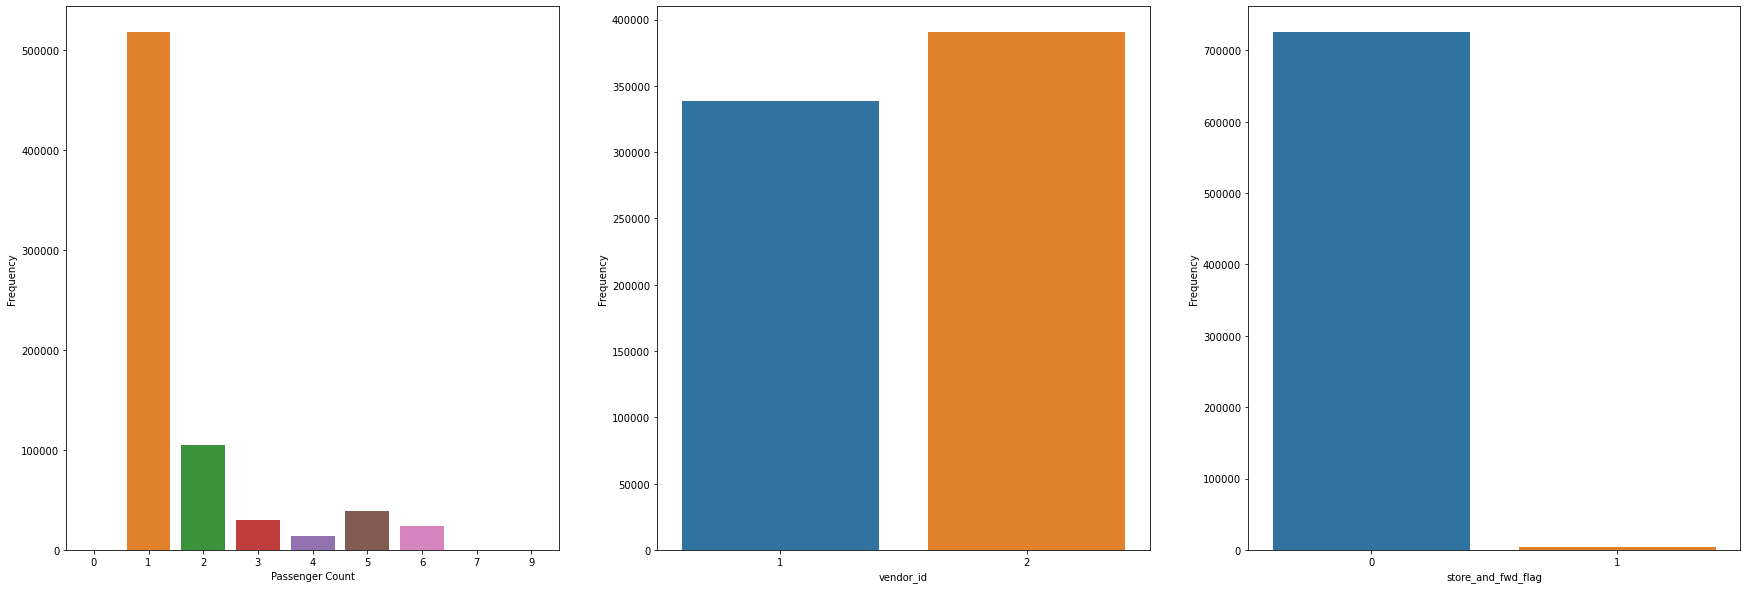

In [10]:
plt.figure(figsize=(30, 10))
#Plotting Passenger Count booking
plt.subplot(131)
sb.countplot(data['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

#Plotting vendor id booking
plt.subplot(132)
sb.countplot(data['vendor_id'])
plt.xlabel('vendor_id')
plt.ylabel('Frequency')

#Plotting the need of buffer space for booking
plt.subplot(133)
sb.countplot(data['store_and_fwd_flag'])
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Frequency')


In [ ]:
'''large number of trips booked are by single passenger.
    Vendor 2 is more popular in accordance of trip booking.
    There are almost no storing space requirement for booking'''

In [11]:
data['pickup_datetime'].min(), data['pickup_datetime'].max() #how long the taxis have been driven for

(Timestamp('2016-01-01 00:01:14'), Timestamp('2016-06-30 23:59:37'))

In [12]:
data['day_of_week'] = data['pickup_datetime'].dt.weekday
data['hour_of_day'] = data['pickup_datetime'].dt.hour
#seperating or taking the weekday and hour units out for analysation

C:\Users\Shruti Negi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Shruti Negi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Total number of pickups')

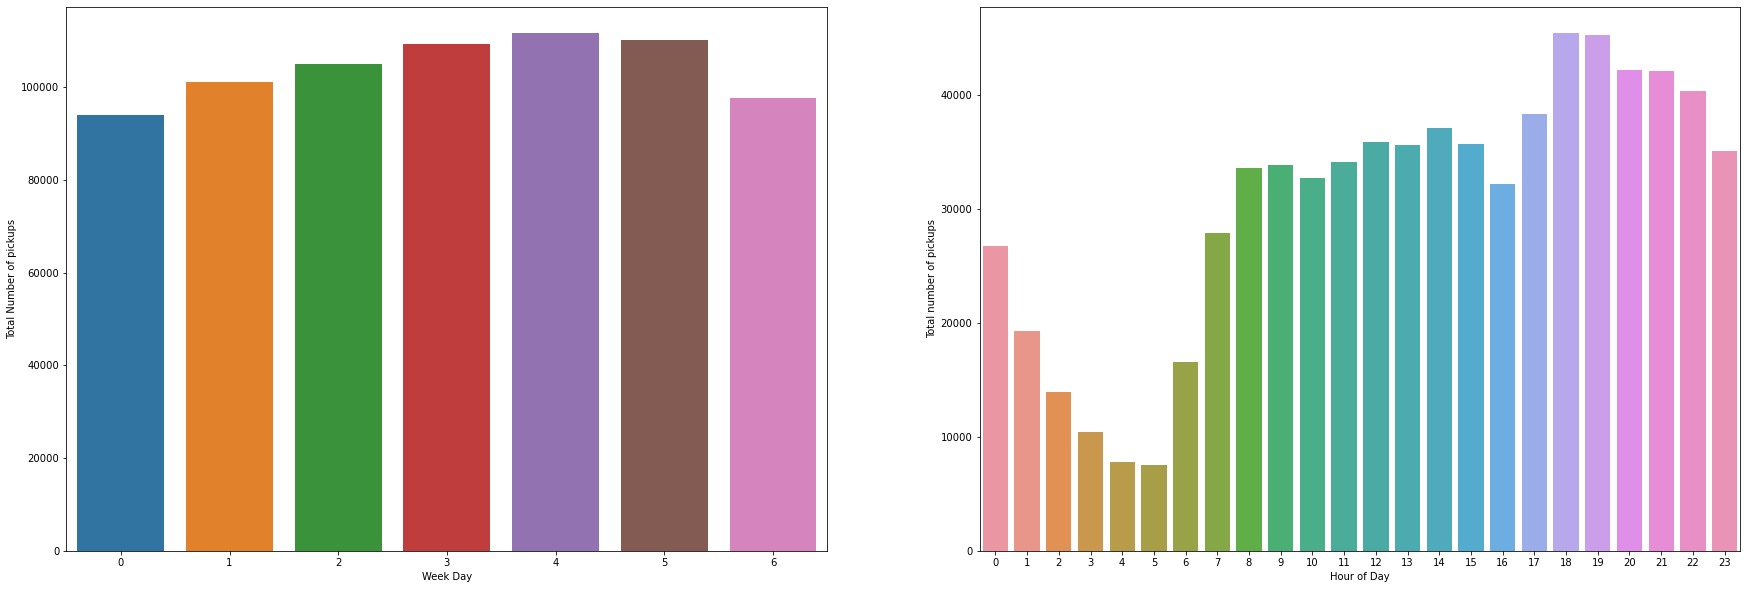

In [13]:
# Datetime features
plt.figure(figsize=(30, 10))

# Passenger Count
plt.subplot(121)
sb.countplot(data['day_of_week'])
plt.xlabel('Week Day')
plt.ylabel('Total Number of pickups')

# vendor_id
plt.subplot(122)
sb.countplot(data['hour_of_day'])
plt.xlabel('Hour of Day')
plt.ylabel('Total number of pickups')

In [ ]:
'''Pickup on Thursday(4) is higher than on any other day, while on weekends the pickups are low compared to all the weekdays
   Pickups are more inclined in rush hour 6-7 pm(19,20),during early morning its significantly low(4-5)'''

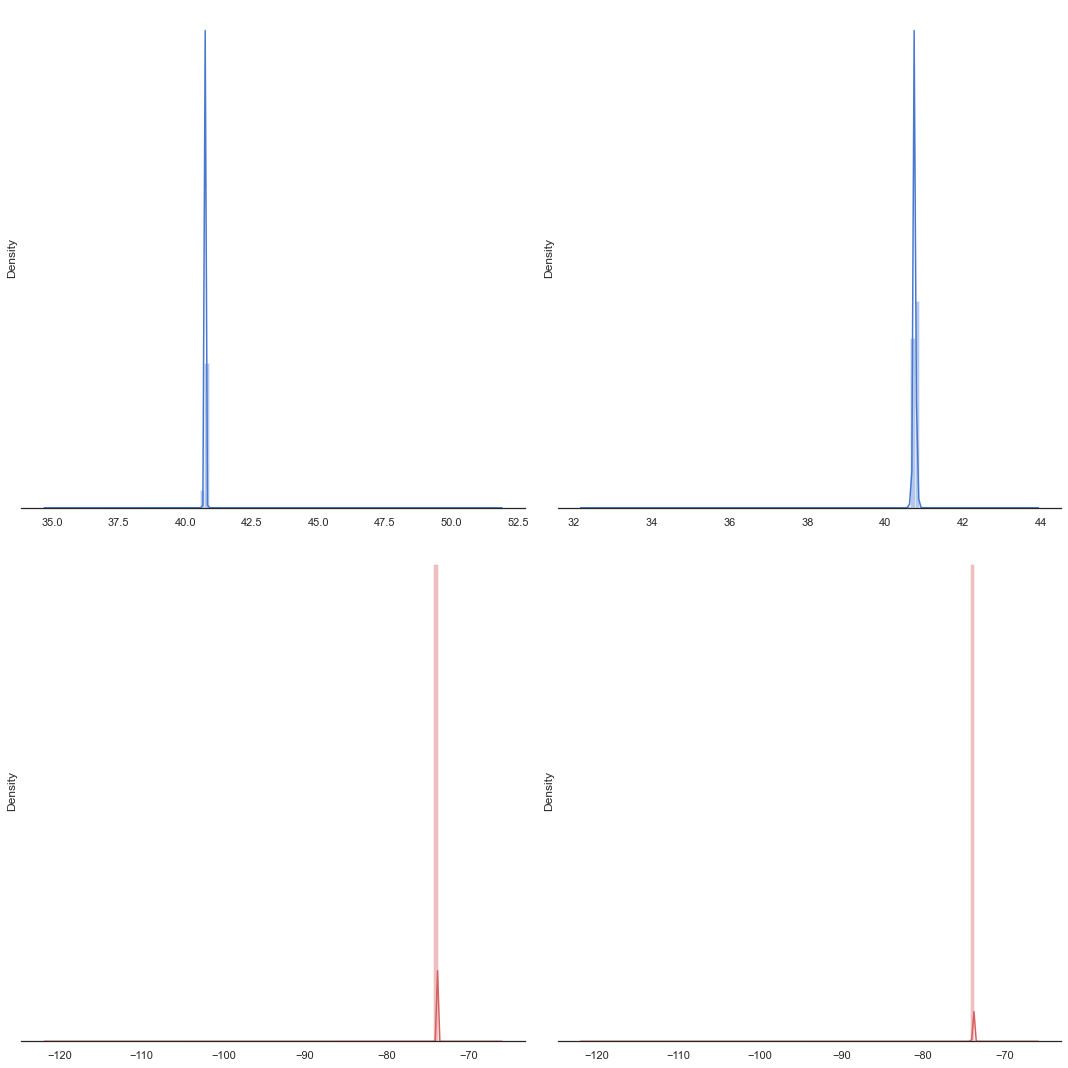

In [19]:
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(15, 15), sharex=False, sharey = False)
sb.despine(left=True)
sb.distplot(data['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(data['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[1,0])
sb.distplot(data['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[0,1])
sb.distplot(data['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1,1])
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

In [ ]:
'''we can conclude that Pickup and Drop latitude are centered around 40 - 41 and Longitude are situated around -74 to -73
   Now will remove outliers'''

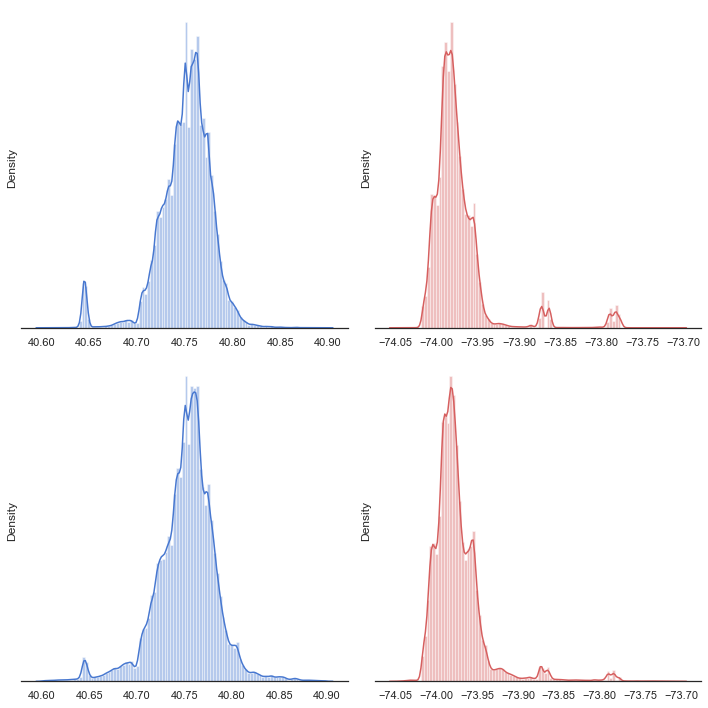

In [20]:
data=data.loc[(data.pickup_latitude > 40.6) & (data.pickup_latitude < 40.9)]
data=data.loc[(data.dropoff_latitude>40.6) & (data.dropoff_latitude < 40.9)]
data=data.loc[(data.dropoff_longitude > -74.05) & (data.dropoff_longitude < -73.7)]
data=data.loc[(data.pickup_longitude > -74.05) & (data.pickup_longitude < -73.7)]
data_new = data.copy()
sb.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2,2,figsize=(10, 10), sharex=False, sharey = False)
sb.despine(left=True)
sb.distplot(data_new['pickup_latitude'].values, label = 'pickup_latitude',color="b",bins = 100, ax=axes[0,0])
sb.distplot(data_new['pickup_longitude'].values, label = 'pickup_longitude',color="r",bins =100, ax=axes[0,1])
sb.distplot(data_new['dropoff_latitude'].values, label = 'dropoff_latitude',color="b",bins =100, ax=axes[1, 0])
sb.distplot(data_new['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins =100, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()

plt.show()

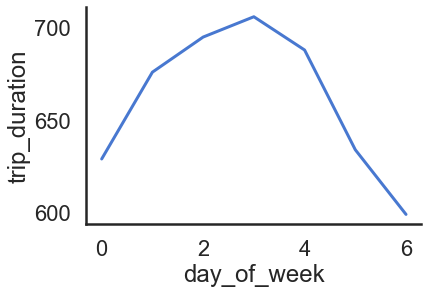

In [26]:
weekdays_avg_duration = pd.DataFrame(data.groupby(['day_of_week'])['trip_duration'].median())
weekdays_avg_duration.reset_index(inplace = True)
weekdays_avg_duration['unit']=1

sb.set(style="white", palette="muted", color_codes=True)
sb.set_context("poster")
sb.lineplot(data=weekdays_avg_duration, x="day_of_week", y="trip_duration")
sb.despine(bottom = False)

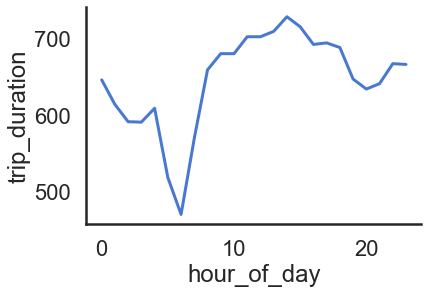

In [27]:
hourly_avg_duration = pd.DataFrame(data.groupby(['hour_of_day'])['trip_duration'].median())
hourly_avg_duration.reset_index(inplace = True)
hourly_avg_duration['unit']=1

sb.set(style="white", palette="muted", color_codes=True)
sb.set_context("poster")
sb.lineplot(data=hourly_avg_duration, x="hour_of_day", y="trip_duration")
sb.despine(bottom = False)

